# Практическое задание 3 
### Ишмаева Бэлла 

## SVM

**1. (0.5 баллов)** 

In [2]:
import pandas as pd
import numpy as np
import sklearn.datasets 
#import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC

In [2]:
dataset_1 = sklearn.datasets.make_blobs(n_samples=500, n_features=2,centers=2, cluster_std=1.35, 
                                        center_box=(-10.0, 10.0), random_state = 42)
dataset_2 = sklearn.datasets.make_moons(n_samples = 500, noise = 0.07, random_state = 42) 
dataset_3 = sklearn.datasets.make_moons(n_samples = 500, noise = 0.25, random_state = 42)

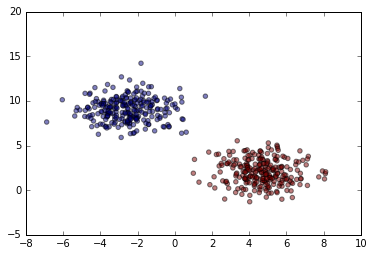

In [3]:
plt.scatter(dataset_1[0][:, 0],dataset_1[0][:, 1], c = dataset_1[1], alpha=0.5)
plt.show()

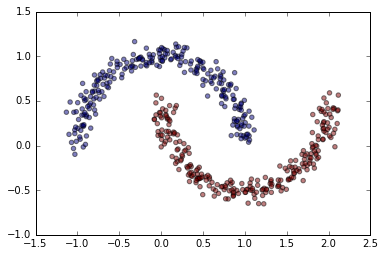

In [4]:
plt.scatter(dataset_2[0][:, 0],dataset_2[0][:, 1], c = dataset_2[1], alpha=0.5)
plt.show()

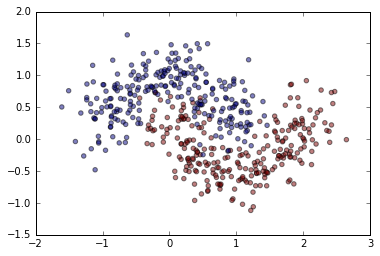

In [5]:
plt.scatter(dataset_3[0][:, 0],dataset_3[0][:, 1], c = dataset_3[1], alpha=0.5)
plt.show()

**2. (1.5 балла)** 

### Dataset_1
линейно разделимый случай

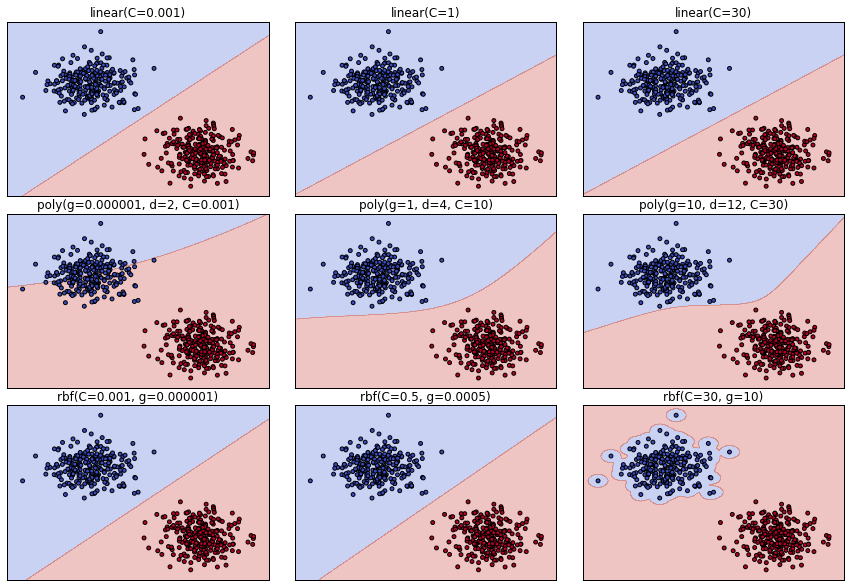

In [42]:
# our data
X = dataset_1[0]
y = dataset_1[1]

# classifiers
C = [0.001, 0.5, 1, 10, 30]
degree = [2,4,6,10,12] # default = 3
gamma = [0.000001,0.0005,0.1,1,10]# auto = 1/n_features = 0.5

models = (SVC(kernel='linear', C=C[0]), 
          SVC(kernel='linear', C=C[2]),
          SVC(kernel='linear', C=C[4]),
          SVC(kernel='poly', degree=degree[0], gamma=gamma[0], C=C[0]),
          SVC(kernel='poly', degree=degree[1], gamma=gamma[3], C=C[3]),
          SVC(kernel='poly', degree=degree[4], gamma=gamma[4], C=C[4]),
          SVC(kernel='rbf', gamma=gamma[0], C=C[0]),
          SVC(kernel='rbf', gamma=gamma[1], C=C[1]),
          SVC(kernel='rbf', gamma=gamma[4], C=C[4]))             

models = (clf.fit(X, y) for clf in models)

# meshgrid
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# prediction
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# plot titles
titles = ('linear(C=0.001)','linear(C=1)','linear(C=30)',
          'poly(g=0.000001, d=2, C=0.001)','poly(g=1, d=4, C=10)','poly(g=10, d=12, C=30)',
          'rbf(C=0.001, g=0.000001)','rbf(C=0.5, g=0.0005)','rbf(C=30, g=10)')

# grid
fig, sub = plt.subplots(3,3)
plt.subplots_adjust(wspace=0.1, hspace=0.1)
fig.set_figheight(10)
fig.set_figwidth(15)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.3)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s = 15, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.show()

* Линейное ядро: параметр C почти никак не влияет в случае линейно разделимой выборки.
* Полиномиальное ядро: перебор всевозможных значений C, $\gamma$ и d (даже очень больших) не помог показать явное переобучение. 
* Гауссовское ядро: даже при самых маленьких значениях C и $\gamma$ не удалось показать недообучение.


### Dataset_2 
не линейно разделимые классы

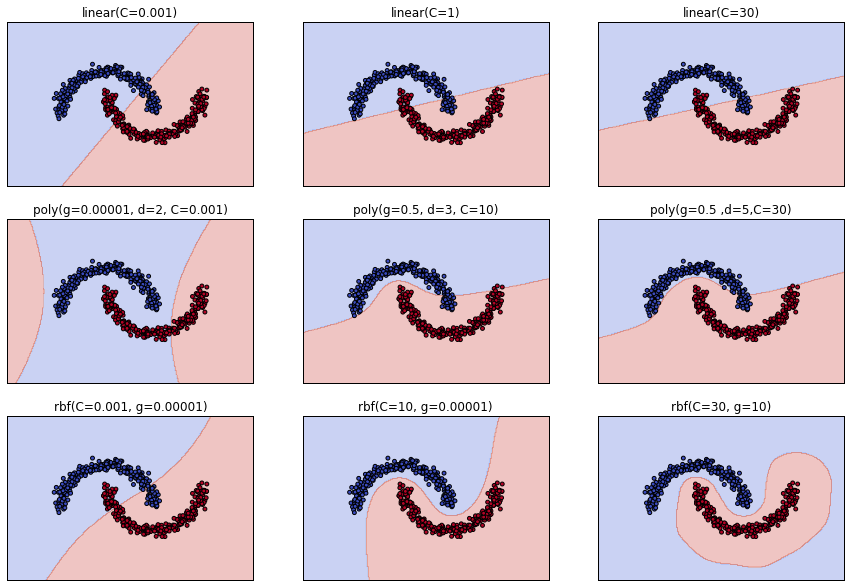

In [20]:
X = dataset_2[0]
y = dataset_2[1]

# classifiers
C = [0.001, 0.5, 1, 10, 30]
degree = [2,3,4,5,10] # default = 3
gamma = [0.00001,0.5,1,5,10]# auto = 1/n_features = 0.5

models = (SVC(kernel='linear', C=C[0]), 
          SVC(kernel='linear', C=C[2]),
          SVC(kernel='linear', C=C[4]),
          SVC(kernel='poly', degree=degree[0], gamma=gamma[0], C=C[0]),
          SVC(kernel='poly', degree=degree[1], gamma=gamma[1], C=C[3]),
          SVC(kernel='poly', degree=degree[3], gamma=gamma[1], C=C[4]),
          SVC(kernel='rbf', gamma=gamma[1], C=C[0]),
          SVC(kernel='rbf', gamma=gamma[1], C=C[3]),
          SVC(kernel='rbf', gamma=gamma[4], C=C[4]),)      

models = (clf.fit(X, y) for clf in models)

# meshgrid
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# prediction
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# plot titles
titles = ('linear(C=0.001)','linear(C=1)','linear(C=30)',
          'poly(g=0.00001, d=2, C=0.001)','poly(g=0.5, d=3, C=10)','poly(g=0.5 ,d=5,C=30)',
          'rbf(C=0.001, g=0.00001)','rbf(C=10, g=0.00001)','rbf(C=30, g=10)')
# grid
fig, sub = plt.subplots(3,3)
plt.subplots_adjust(wspace=0.2, hspace=0.2)
fig.set_figheight(10)
fig.set_figwidth(15)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.3)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s = 15, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.show()

* Линейное ядро: как и для прошлого датасета параметр C почти никак не влияет (меняется наклон прямой при очень маленьких C).
* Полиномиальное ядро: перебор значений C, $\gamma$ и d не помог добиться хорошего разделения двух выборок, поэтому случаи "нормальное обучение" и "переобучение" - немного похожи. 
* Гауссовское ядро: явно видны все три случая - недообучение, нормальное обучение и переобучение.


### Dataset_3 
плохо разделимые классы

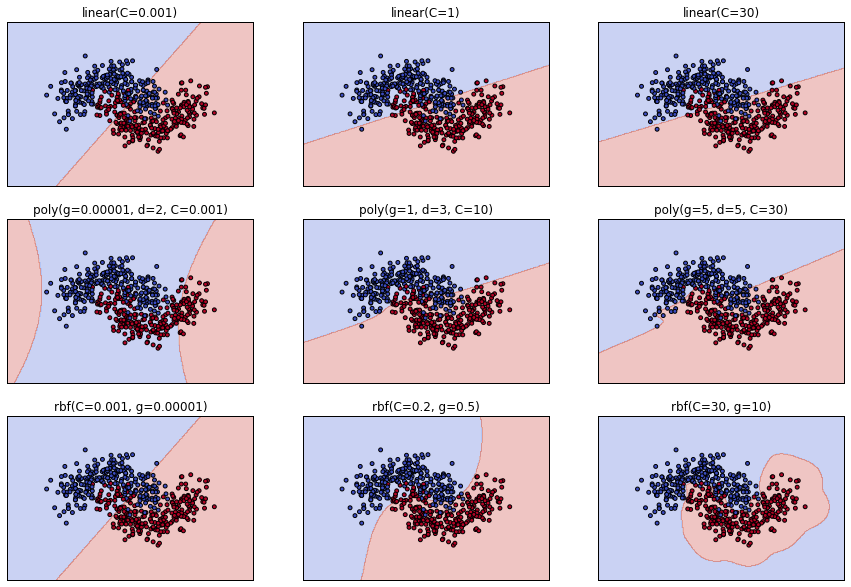

In [28]:
# our data
X = dataset_3[0]
y = dataset_3[1]

# classifiers
C = [0.001, 0.2, 1, 10, 30]
degree = [2,3,4,5,10] # default = 3
gamma = [0.00001,0.5,1,5,10]# auto = 1/n_features = 0.5

models = (SVC(kernel='linear', C=C[0]), 
          SVC(kernel='linear', C=C[2]),
          SVC(kernel='linear', C=C[4]),
          SVC(kernel='poly', degree=degree[0], gamma=gamma[0], C=C[0]),
          SVC(kernel='poly', degree=degree[1], gamma=gamma[2], C=C[3]),
          SVC(kernel='poly', degree=degree[3], gamma=gamma[3], C=C[4]),
          SVC(kernel='rbf', gamma=gamma[0], C=C[0]),
          SVC(kernel='rbf', gamma=gamma[1], C=C[1]),
          SVC(kernel='rbf', gamma=gamma[4], C=C[4]))             

models = (clf.fit(X, y) for clf in models)

# meshgrid
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# prediction
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# plot titles
titles = ('linear(C=0.001)','linear(C=1)','linear(C=30)',
          'poly(g=0.00001, d=2, C=0.001)','poly(g=1, d=3, C=10)','poly(g=5, d=5, C=30)',
          'rbf(C=0.001, g=0.00001)','rbf(C=0.2, g=0.5)','rbf(C=30, g=10)')

# grid
fig, sub = plt.subplots(3,3)
plt.subplots_adjust(wspace=0.2, hspace=0.2)
fig.set_figheight(10)
fig.set_figwidth(15)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.3)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s = 15, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.show()

* Линейное ядро: опять параметр C меняет наклон прямой только при очень маленьких значениях.
* Полиномиальное ядро: перевбрав различные $\gamma$, d, C, удалось добиться лишь небольшшого отличия для графика "нормальное обучение"(посередине) и "переобучение"(справа). Разделяющая плоскость остается прямой либо совсем меняет форму так, что она перестает быть похожей хоть на какое-то обучение.
* Гауссовское ядро: явно виднны все три случая - недообучение, нормальное обучение и переобучение.

Графики построены по аналогии с [данным примером](http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html).


**3. (1 балл)** 

* ### Полиномиальное ядро:

*С - параметр регуляризации, то есть штраф за то, что точки неправильно классифицируются (чем выше C, тем сильнее штраф). Влияет на то, как далеко будет лежать граница разделяющей области от крайних наблюдений.*

*$\gamma$ влияет на то, как сильно область "повторяет облако точек". Если $\gamma$ большая, то алгоритм старается ухватить каждую точку (т.е. переобучение). Если $\gamma$ очень маленькая, то модель ведет себя как линейная, разделяя два класса по двум "центрам тяжести" их плотности (т.е. недообучение).*

*степень d влияет на гибкость модели, чем больше d, тем точнее алгоритом "огибает" точки (т.е. переобучене)*


* ### Гауссовское ядро:

*С - аналогично предыдущему пункту, так как не зависит от конкретно выбранного ядра*

*$\gamma$ - аналогично предыдущему пункту*

Опираясь на [объяснения scikit learn](http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html)

**4. (1.5 балл)** 

In [138]:
bio_responce = pd.read_csv("train.csv")
bio_responce.head(1)

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.0,0.497009,0.1,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0


In [139]:
from sklearn.cross_validation import train_test_split

X = bio_responce.drop("Activity", axis = 1)
y = bio_responce.Activity

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [140]:
# обучаем модель для C=1 и дефолтными значениями gamma, degree
C = 1

clf_lin = SVC(kernel='linear', C=C)
clf_lin.fit(X_train, y_train)
y_predict = clf_lin.predict(X_test)
print("Accuracy с линейным ядром: ", sklearn.metrics.accuracy_score(y_test, y_predict))

clf_poly = SVC(kernel='poly', C=C)
clf_poly.fit(X_train, y_train)
y_predict = clf_poly.predict(X_test)
print("Accuracy с полиномиальным ядром: ", sklearn.metrics.accuracy_score(y_test, y_predict))

clf_rbf = SVC(kernel='rbf', C=C)
clf_rbf.fit(X_train, y_train)
y_predict = clf_rbf.predict(X_test)
print("Accuracy с гауссовским ядром: ", sklearn.metrics.accuracy_score(y_test, y_predict))

Accuracy с линейным ядром:  0.733475479744
Accuracy с полиномиальным ядром:  0.559168443497
Accuracy с гауссовским ядром:  0.690831556503


In [141]:
# видим, что дефолтные значения не позволяют достичь accuracy = 0.75
# воспользуемся gridsearch
from sklearn.model_selection import GridSearchCV 

# для полиномиального ядра
parameters = {'gamma':[0.01,0.05, 0.1, 0.15, 0.2], 'degree': [4,5,6,7,8]}
clf_poly = GridSearchCV(SVC(kernel = 'poly', C = 1), parameters, scoring = 'accuracy')
clf_poly.fit(X_train,y_train)
y_predict = clf_poly.predict(X_test)
print("Полиномиальное ядро")
print("accuracy: ", sklearn.metrics.accuracy_score(y_test, y_predict))
print("параметры: ", clf_poly.best_params_)
print()

# для гауссовского ядра
parameters = {'gamma':[0.01,0.05, 0.1, 0.15, 0.2]}
clf_rbf = GridSearchCV(SVC(kernel = 'rbf', C = 1), parameters, scoring = 'accuracy')
clf_rbf.fit(X_train,y_train)
y_predict = clf_rbf.predict(X_test)
print("Гауссовское ядро")
print("accuracy: ", sklearn.metrics.accuracy_score(y_test, y_predict))
print("параметры: ", clf_rbf.best_params_)

Полиномиальное ядро
accuracy:  0.73987206823
параметры:  {'degree': 6, 'gamma': 0.05}

Гауссовское ядро
accuracy:  0.77132196162
параметры:  {'gamma': 0.01}


*Получили модель с гауссовским ядром и параметроми C=1 gamma=0.01, которая имеет accuracy=0.77. Линейная модель с C=1 имела accuracy=0.73, поэтому использование нелинейных ядер позволяет достичь более высокого accuracy score на тестовой выборке.*

## SVD

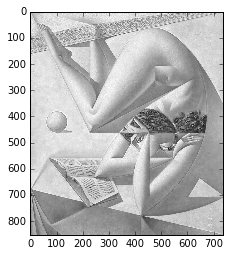

In [3]:
from PIL import Image
from scipy import misc
import sys

img = misc.imread(r'art.jpg')
# Для удобства оставим только один канал.
img = img[:,:,0]
plt.imshow(img, cmap='gray');

In [4]:
print('размер img: ', sys.getsizeof(img))
print('размер матрицы img: ', img.shape)

размер img:  112
размер матрицы img:  (853, 736)


**5. (1 балла)** 

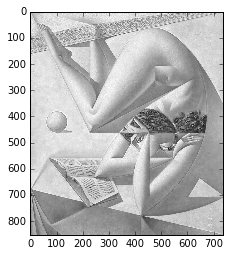

In [5]:
U, d, V = np.linalg.svd(img) 

D = np.zeros((len(U), len(V)),  dtype=complex)
D[:len(V), :len(V)] = np.diag(d)

# восстановим картинку по матрицам U, D, V
plt.imshow(np.real(U @ D @ V), cmap='gray');

In [6]:
# матрица V, которую возвращает функция, уже транспонированная
# то есть нам нужно брать строчки матрицы V или колонки V.T

def pca_plot_first(n):
    if n == 1:
        pc = U[:, 0].reshape(len(U), 1) @ D[0,0].reshape(1,1) @ V[0, :].reshape(1, len(V))
        plt.imshow(np.real(pc), cmap = 'gray')
    elif n > 736:
        pass
    else:    
        pc = U[:, 0:n] @ D[0:n, 0:n] @ V[0:n, :]
        plt.imshow(np.real(pc), cmap = 'gray')
        
def pca_plot_last(m):
    if m > 736:
        pass
    else:    
        pc = U[:, 736-m:736] @ D[736-m:736, 736-m:736] @ V[736-m:736, :]
        plt.imshow(np.real(pc), cmap = 'gray')        

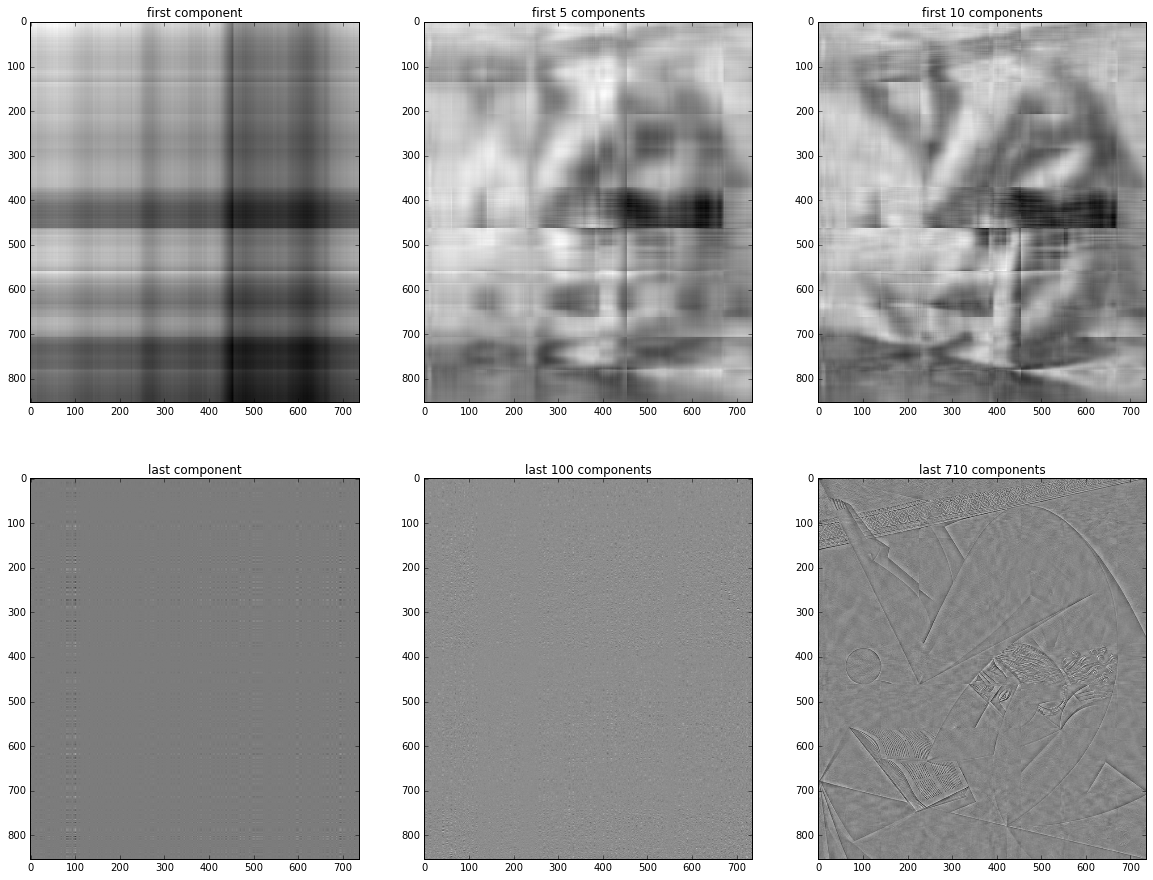

In [7]:
fig = plt.figure()
plt.subplots_adjust(wspace=0.2, hspace=0.2)
fig.set_figheight(15)
fig.set_figwidth(20)

ax1 = fig.add_subplot(231)
pca_plot_first(1)
ax1.set_title('first component')

ax2 = fig.add_subplot(232)
pca_plot_first(5)
ax2.set_title('first 5 components')

ax3 = fig.add_subplot(233)
pca_plot_first(10)
ax3.set_title('first 10 components')

ax1 = fig.add_subplot(234)
pca_plot_last(1)
ax1.set_title('last component')

ax2 = fig.add_subplot(235)
pca_plot_last(100)
ax2.set_title('last 100 components')

ax3 = fig.add_subplot(236)
pca_plot_last(710)
ax3.set_title('last 710 components')

plt.show()

* #### Первые компоненты
*по визуализации первой pc можно увидеть четкую структуру вертикальных и горизонтальных полос. С ростом количества компонент такие простые картинки накладываются друг на друга и начиная с некоторого количества (в нашем случае с 10) можно узнать исходный рисунок.* Объяснение основывается на этом [посте](https://stats.stackexchange.com/questions/177102/what-is-the-intuition-behind-svd/179042#179042).

* #### Последние компоненты
*посмотрев на последнию компоненту, можно увидеть только шум. Последние 710 компонент отвечают за диагональные штрихи (например в левом верхнем углу).* 

Можно сделать вывод, что первые компоненты отвечают за вертикально-горизонтальную стуктуру, а последние за шумы, диагональные элементы и текстуру - то есть то, что нельзя представить как наложение вертикальных и горизонтальных прямых.

**6. (1 балл)** 

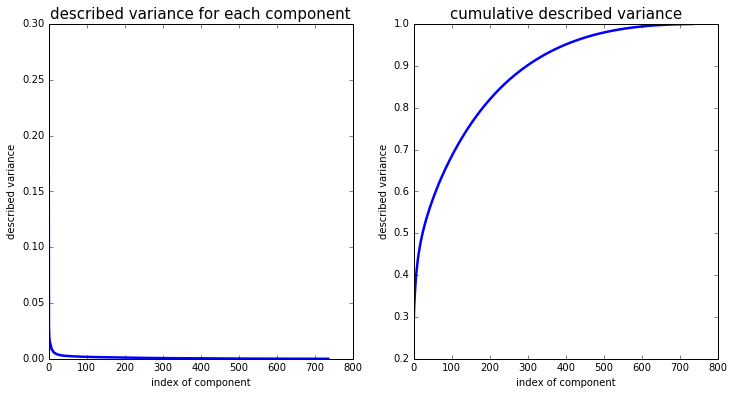

In [8]:
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(12)

ax1 = fig.add_subplot(121)
plt.plot(d/sum(d), linewidth=2.5)
ax1.set_title('described variance for each component', fontsize=15)
plt.xlabel('index of component')
plt.ylabel('described variance')

dv = np.cumsum(d)/sum(d)
ax2 = fig.add_subplot(122)
plt.plot(dv, linewidth=2.5)
ax2.set_title('cumulative described variance', fontsize=15)
plt.xlabel('index of component')
plt.ylabel('described variance')

plt.show()

Первый график отражает вклад каждой компоненты в долю объясненной дисперсию. Видно, что после 100-ой, этот вклад очень маленький. Второй график отражает накопленную долю объясненной дисперсии. Например, первые 100 компонент объясняют 70%, что должно быть достаточно для восстановления картинки. 

Посмотрим на картинку по 100 первым главным компонентам и, для сравнения, по 30 (которые объясняют ~ 50% дисперсии)

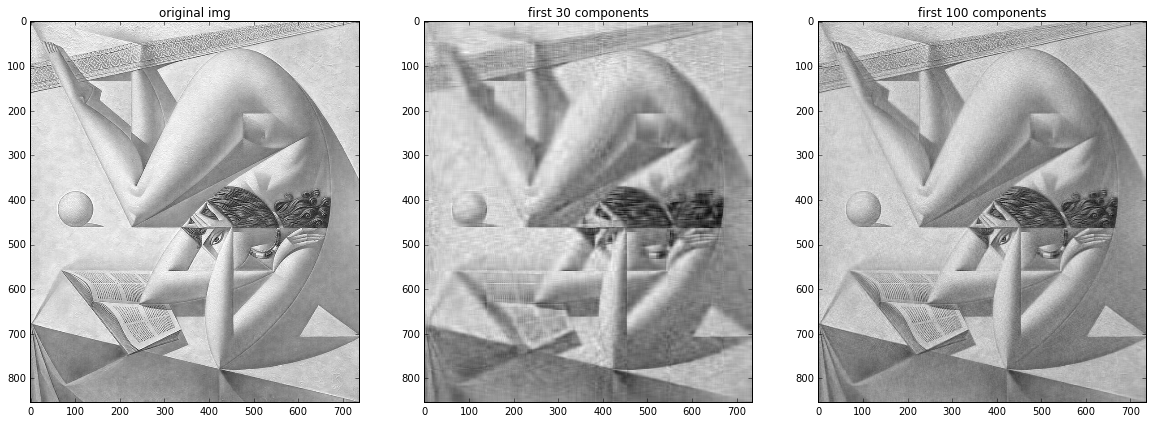

In [9]:
fig = plt.figure()
plt.subplots_adjust(wspace=0.2, hspace=0.2)
fig.set_figheight(15)
fig.set_figwidth(20)

ax1 = fig.add_subplot(131)
plt.imshow(img, cmap='gray')
ax1.set_title('original img')

ax2 = fig.add_subplot(132)
pca_plot_first(30)
ax2.set_title('first 30 components')

ax3 = fig.add_subplot(133)
pca_plot_first(110)
ax3.set_title('first 100 components')

Чтобы визульно определить, что нарисовано на картинке, вполне достаточно первых 30 компонент, но для четкости деталей - 100.

In [10]:
import warnings
warnings.filterwarnings("ignore")

size_img = sys.getsizeof(np.array(U, dtype = np.float32)) + sys.getsizeof(np.array(D, dtype = np.float32)) + sys.getsizeof(np.array(V, dtype = np.float32)) 

size_30 = sys.getsizeof(np.array(U[:, 0:30], dtype = np.float32)) + sys.getsizeof(np.array(D[0:30, 0:30], dtype = np.float32)) + sys.getsizeof(np.array(V[0:30, :], dtype = np.float32))    

size_100 = sys.getsizeof(np.array(U[:, 0:100], dtype = np.float32)) + sys.getsizeof(np.array(D[0:100, 0:100], dtype = np.float32)) + sys.getsizeof(np.array(V[0:100, :], dtype = np.float32))
        
print("размер исходной картинки: ", size_img, "байт")
print()
print("размер картинки по 30 первым компонентам: ", size_30, "байт")
print("это занимает меньше памяти в ", np.round_(size_img/size_30,2), "раз")
print()
print("размер картинки по 100 первым компонентам: ", size_100, "байт")
print("это занимает меньше памяти в ", np.round_(size_img/size_100,2), "раз")

размер исходной картинки:  7588788 байт

размер картинки по 30 первым компонентам:  194616 байт
это занимает меньше памяти в  38.99 раз

размер картинки по 100 первым компонентам:  675936 байт
это занимает меньше памяти в  11.23 раз


*Тут возникли споры о том, нужно ли считать размер как сумму размеров матриц или размер их произведения, я выбрала второй способ.*

## PCA

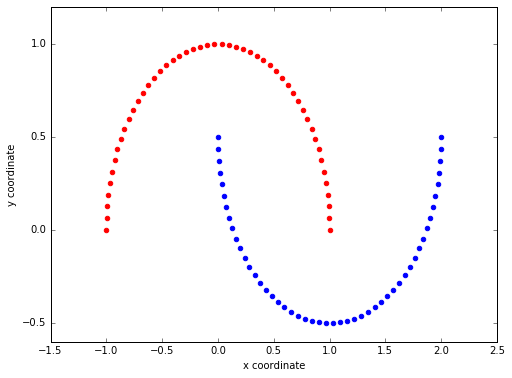

In [132]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=654)

plt.figure(figsize=(8,6))
plt.scatter(X[y==0, 0], X[y==0, 1], color='red')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')
plt.show()

### Linear PCA

**7. (1 балл)** 

In [133]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

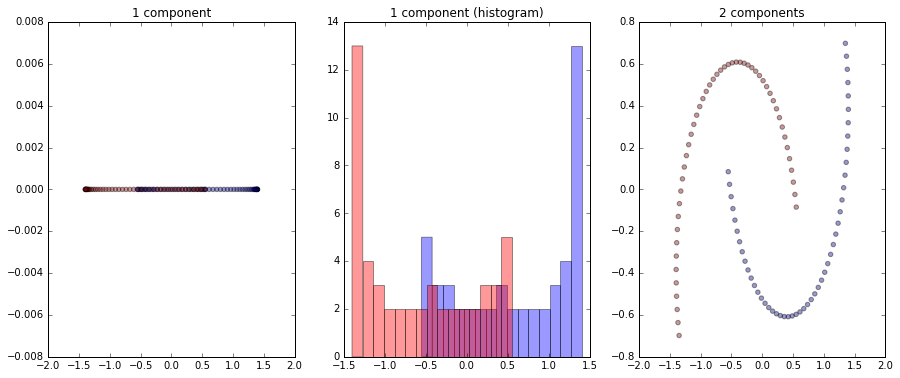

In [134]:
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(15)

ax1 = fig.add_subplot(131)
plt.scatter(X[:, 0], np.zeros(100),c = y, alpha = 0.4)
plt.title("1 component")

ax2 = fig.add_subplot(132)
plt.hist(X[y==0, 0], bins =15, color='blue', alpha = 0.4)
plt.hist(X[y==1, 0], bins =15, color='red', alpha = 0.4)
plt.title("1 component (histogram)")

ax3 = fig.add_subplot(133)
plt.scatter(X[:, 0], X[:, 1], c = y, alpha = 0.4)
plt.title("2 components")

plt.show()

### RBF PCA

**8. (0.5 балла)** 

In [135]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

In [136]:
def stepwise_kpca(X, gamma, n_components):
    """
    X: A MxN dataset as NumPy array where the samples are stored as rows (M), features as columns (N).
    gamma: coefficient for the RBF kernel.
    n_components: number of components to be returned.

    """
    # Calculating the squared Euclidean distances for every pair of points
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')

    # Converting the pairwise distances into a symmetric MxM matrix.
    mat_sq_dists = squareform(sq_dists)

    K = np.exp(-gamma*mat_sq_dists)

    # Centering the symmetric NxN kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenvalues in descending order with corresponding
    # eigenvectors from the symmetric matrix.
    eigvals, eigvecs = eigh(K)

    # Obtaining the i eigenvectors that corresponds to the i highest eigenvalues.
    X_pc = np.column_stack((eigvecs[:,-i] for i in range(1,n_components+1)))

    return X_pc

Очевидно, что код находится на [stackoverflow](https://stackoverflow.com/questions/46123169/python-implementation-of-precomputed-rbf-kernel-with-gram-matrix).

**9. (2 балл)**  

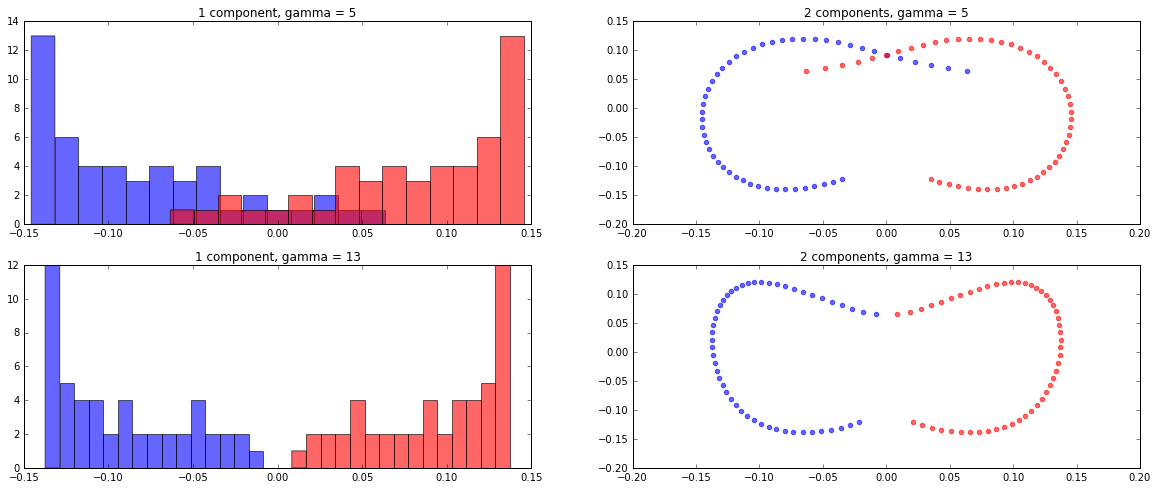

In [137]:
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(20)

# gamma = 5
X_5_1 = stepwise_kpca(X, gamma=5, n_components=1)
ax1 = fig.add_subplot(221)
plt.hist(X_5_1[y==0, 0], bins =15, color='blue', alpha = 0.6)
plt.hist(X_5_1[y==1, 0], bins =15, color='red', alpha = 0.6)
plt.title("1 component, gamma = 5")

X_5_2 = stepwise_kpca(X, gamma=5, n_components=2)
ax2 = fig.add_subplot(222)
plt.scatter(X_5_2[y==0, 0], X_12[y==0, 1], color='blue', alpha = 0.6)
plt.scatter(X_5_2[y==1, 0], X_12[y==1, 1], color='red', alpha = 0.6)
plt.title("2 components, gamma = 5")

# gamma = 13
X_13_1 = stepwise_kpca(X, gamma=13, n_components=1)
ax1 = fig.add_subplot(223)
plt.hist(X_13_1[y==0, 0], bins =15, color='blue', alpha = 0.6)
plt.hist(X_13_1[y==1, 0], bins =15, color='red', alpha = 0.6)
plt.title("1 component, gamma = 13")

X_13_2 = stepwise_kpca(X, gamma=13, n_components=2)
ax2 = fig.add_subplot(224)
plt.scatter(X_13_2[y==0, 0], X_12[y==0, 1], color='blue', alpha = 0.6)
plt.scatter(X_13_2[y==1, 0], X_12[y==1, 1], color='red', alpha = 0.6)
plt.title("2 components, gamma = 13")
plt.show()

Чем больше параметр $\gamma$, тем сильнее разделяется выборка => перебором находим, что при $\gamma$=13 выборка становится линейно разделимой.